#  in this we will read data and assign weights to activities to make data gamified and then calculate xp after that we will add xp for a student in a particular course

In [1]:

import pandas as pd


student_vle = pd.read_csv("studentVle.csv")
vle = pd.read_csv("vle.csv")

# here we assign weights to activity types to give them points
activity_weights = {
    'resource': 2,
    'oucontent': 3,
    'homepage': 1,
    'url': 1.5,
    'subpage': 2.5
}

# as we have to Map activity_type to weight in vle so
vle['weight'] = vle['activity_type'].map(activity_weights)

# merging student interactions with vle to get weight
merged_df = pd.merge(student_vle, vle[['id_site', 'weight']], on='id_site', how='left')

# this is for Filling missing weights with 0 
merged_df['weight'] = merged_df['weight'].fillna(0)

# here we will now Compute XP = sum_click × weight
merged_df['xp'] = merged_df['sum_click'] * merged_df['weight']

# here we are Aggregating total XP per student 
xp_df = merged_df.groupby(['code_module', 'code_presentation', 'id_student'])['xp'].sum().reset_index()
xp_df.rename(columns={'xp': 'total_xp'}, inplace=True)

xp_df.head()




,code_module,code_presentation,id_student,total_xp
0,AAA,2013J,11391,1910.5
1,AAA,2013J,28400,2248.5
2,AAA,2013J,30268,326.0
3,AAA,2013J,31604,3473.0
4,AAA,2013J,32885,1994.5


# int this we converted dates to weeks then summed all xp for each week for each student

In [2]:

merged_df['week'] = (merged_df['date'] // 7).clip(lower=0).astype(int)
weekly_xp_df = merged_df.groupby(['code_module', 'code_presentation', 'id_student', 'week'])['xp'].sum().reset_index()

weekly_xp_df.sort_values(by=['id_student', 'week']).head(10)


#  Weekly XP activity timelines per student.
# Creating 'week' column from 'date' (each week = 7 days, clip negatives to 0)
# Step 2.2: Aggregate XP per student per week

,code_module,code_presentation,id_student,week,xp
10071,AAA,2014J,6516,0,830.0
10072,AAA,2014J,6516,1,28.5
10073,AAA,2014J,6516,2,165.5
10074,AAA,2014J,6516,3,542.5
10075,AAA,2014J,6516,4,104.0
10076,AAA,2014J,6516,5,39.5
10077,AAA,2014J,6516,6,11.5
10078,AAA,2014J,6516,7,154.0
10079,AAA,2014J,6516,8,107.0
10080,AAA,2014J,6516,9,76.5


# just changing the view so that we can have better understanding of data naming col by week

In [3]:

xp_pivot_df = weekly_xp_df.pivot_table(
    index=['code_module', 'code_presentation', 'id_student'],
    columns='week',
    values='xp',
    fill_value=0
)

xp_pivot_df.columns = [f'xp_week_{int(col)}' for col in xp_pivot_df.columns]

xp_pivot_df = xp_pivot_df.reset_index()


xp_pivot_df.head(10)

# making the weekly XP data to wide format
# here we did the Renaming of columns to xp_week_0, xp_week_1, ...
# Reset index to flatten the DataFrame

,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_29,xp_week_30,xp_week_31,xp_week_32,xp_week_33,xp_week_34,xp_week_35,xp_week_36,xp_week_37,xp_week_38
0,AAA,2013J,11391,704.0,57.5,171.5,0.0,51.5,98.5,4.0,...,0.0,102.0,52.0,0.0,1.0,245.0,2.0,1.0,0.0,0.0
1,AAA,2013J,28400,517.5,75.5,37.0,93.0,169.5,0.0,8.0,...,2.0,180.5,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,352.5,212.5,181.5,43.0,152.5,213.0,73.5,...,47.5,15.0,44.5,75.0,1.0,55.5,5.0,1.0,2.0,0.0
4,AAA,2013J,32885,568.0,286.5,57.0,135.5,48.0,44.0,0.0,...,10.5,0.0,91.0,72.5,26.0,4.5,3.0,0.0,0.0,0.0
5,AAA,2013J,38053,393.0,176.5,164.5,38.0,33.0,52.0,95.0,...,121.5,24.0,1020.0,62.0,51.0,48.0,5.0,3.0,5.0,1.0
6,AAA,2013J,45462,576.0,0.0,451.5,105.0,221.0,43.0,13.5,...,142.0,92.0,0.0,0.0,0.0,329.0,0.0,3.0,0.0,1.0
7,AAA,2013J,45642,74.5,85.5,246.0,126.0,38.5,71.5,10.5,...,41.0,45.5,65.0,175.0,110.5,9.5,3.0,0.0,3.0,0.0
8,AAA,2013J,52130,52.5,56.5,331.5,159.0,118.5,83.0,7.5,...,6.5,207.0,242.0,135.5,5.0,70.5,3.0,0.0,0.0,0.0
9,AAA,2013J,53025,390.0,175.5,60.5,13.0,14.0,26.0,0.0,...,7.0,27.5,1.0,3.0,3.0,7.0,4.0,2.0,0.0,0.0


# now as we want labels to train and test data whether the student failed or not

In [4]:

student_info = pd.read_csv("studentInfo.csv")

xp_features_df = pd.merge(
    xp_pivot_df,
    student_info[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

xp_features_df['label'] = xp_features_df['final_result'].apply(
    lambda x: 1 if x in ['Pass', 'Distinction'] else 0
)
xp_features_df.head()

# add the final_result label from studentInfo.csv, which tells whether each student passed or failed.

,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_31,xp_week_32,xp_week_33,xp_week_34,xp_week_35,xp_week_36,xp_week_37,xp_week_38,final_result,label
0,AAA,2013J,11391,704.0,57.5,171.5,0.0,51.5,98.5,4.0,...,52.0,0.0,1.0,245.0,2.0,1.0,0.0,0.0,Pass,1
1,AAA,2013J,28400,517.5,75.5,37.0,93.0,169.5,0.0,8.0,...,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,Pass,1
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn,0
3,AAA,2013J,31604,352.5,212.5,181.5,43.0,152.5,213.0,73.5,...,44.5,75.0,1.0,55.5,5.0,1.0,2.0,0.0,Pass,1
4,AAA,2013J,32885,568.0,286.5,57.0,135.5,48.0,44.0,0.0,...,91.0,72.5,26.0,4.5,3.0,0.0,0.0,0.0,Pass,1


# now we have to make clusters

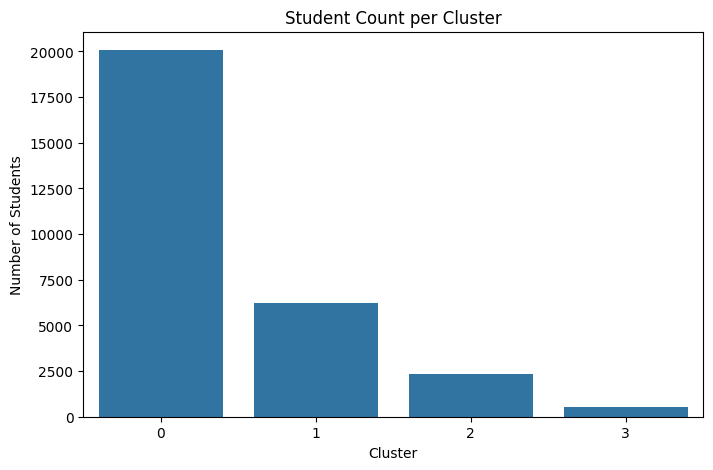

In [5]:
# KMeans Clustering on XP Features

# Select weekly XP features: columns 0 to 38 (for weeks 0–38)
xp_weekly_features = xp_features_df[[f'xp_week_{i}' for i in range(39)]]


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

xp_weekly_features = xp_weekly_features.fillna(0)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(xp_weekly_features)

xp_features_df['cluster'] = clusters


plt.figure(figsize=(8, 5))
sns.countplot(x=xp_features_df['cluster'])
plt.title("Student Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Students")
plt.show()

# filling missing values if any
# Step 1: Try k=4 as per the paper
# Step 2: Add the cluster labels to your main dataframe
# Step 3: Visualize the clusters (optional)

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

xp_columns = [col for col in xp_features_df.columns if col.startswith('xp_week_')]
X = xp_features_df[xp_columns].copy()
y = xp_features_df['cluster'].copy()

cluster_sizes = Counter(y)
Lb = max(cluster_sizes.values())  # Largest cluster size
Ls = min(cluster_sizes.values())  # Smallest cluster size
n = max(1, Ls - 1)  # SMOTE k_neighbors

print("Cluster sizes before balancing:", cluster_sizes)
print(f"Largest Cluster (Lb): {Lb}, Smallest Cluster (Ls): {Ls}, n: {n}")

sampling_strategy = {label: Lb for label, count in cluster_sizes.items() if count < Lb}

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=n, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

balanced_df = pd.DataFrame(X_balanced, columns=xp_columns)
balanced_df['cluster'] = y_balanced

new_cluster_sizes = Counter(y_balanced)
print("Cluster sizes after balancing:", new_cluster_sizes)

# Step 1: Extract XP features and cluster labels
# Step 2: Compute sizes
# Step 3: Custom sampling strategy — only oversample minority clusters to match Lb
# Step 4: Apply SMOTE only on minority clusters
# Step 5: Combine into a balanced DataFrame
# Step 6: Check new sizes

Cluster sizes before balancing: Counter({0: 20078, 1: 6246, 2: 2349, 3: 555})
Largest Cluster (Lb): 20078, Smallest Cluster (Ls): 555, n: 554
Cluster sizes after balancing: Counter({1: 20078, 0: 20078, 2: 20078, 3: 20078})


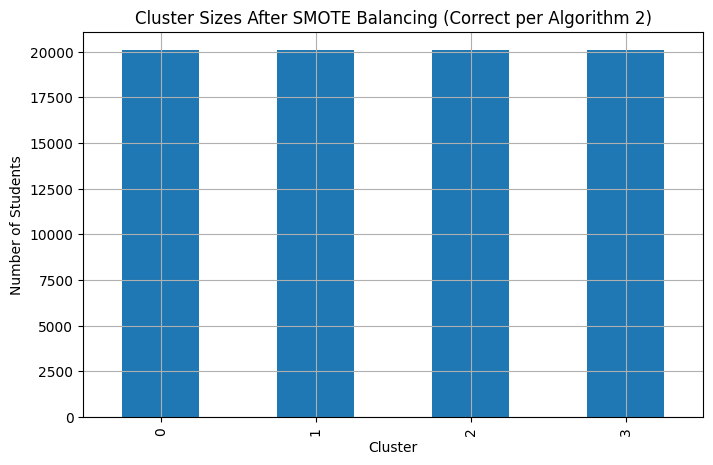

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Sizes After SMOTE Balancing (Correct per Algorithm 2)')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


In [8]:





from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

xp_columns = [col for col in xp_features_df.columns if col.startswith('xp_week_')]
X = xp_features_df[xp_columns].values
y = xp_features_df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', random_state=42)
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=42)

boruta_selector.fit(X_scaled, y)

selected_features = [xp_columns[i] for i, selected in enumerate(boruta_selector.support_) if selected]

print(" Selected Features:")
print(selected_features)


# 1. Define features and label
# 2. Scale XP features
# 3. Define RandomForest and Boruta
# 4. Fit Boruta
# 5. Get selected features

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	10
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	10
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	10
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	10
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	9
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	9
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	9
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	9
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	23
Tentative: 	9
Rejected: 

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#  Step 1: Reset index
xp_features_df = xp_features_df.reset_index(drop=True)

#  Step 2: Debug column names and fix renaming
print(" Columns before renaming:", xp_features_df.columns.tolist())

# Rename columns correctly if merged earlier
if 'label_x' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'label_x': 'label'})
elif 'label_y' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'label_y': 'label'})

if 'id_student_x' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'id_student_x': 'id_student'})

#  Step 3: Drop rows with missing labels
xp_features_df = xp_features_df.dropna(subset=['label'])

#  Step 4: Select XP feature columns
feature_cols = [col for col in xp_features_df.columns if col.startswith('xp_week_')]
X = xp_features_df[feature_cols]
y = xp_features_df['label']

#  Step 5: Apply Boruta feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=1, random_state=42)
boruta_selector.fit(X.values, y)

# Step 6: Get selected features
selected_features = X.columns[boruta_selector.support_].tolist()
print(" Selected Features by Boruta:")
print(selected_features)

# Filter data with only selected features
X_selected = X[selected_features]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

#  Step 9: Train and evaluate models
for name, model in models.items():
    print(f"\n Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


 Columns before renaming: ['code_module', 'code_presentation', 'id_student', 'xp_week_0', 'xp_week_1', 'xp_week_2', 'xp_week_3', 'xp_week_4', 'xp_week_5', 'xp_week_6', 'xp_week_7', 'xp_week_8', 'xp_week_9', 'xp_week_10', 'xp_week_11', 'xp_week_12', 'xp_week_13', 'xp_week_14', 'xp_week_15', 'xp_week_16', 'xp_week_17', 'xp_week_18', 'xp_week_19', 'xp_week_20', 'xp_week_21', 'xp_week_22', 'xp_week_23', 'xp_week_24', 'xp_week_25', 'xp_week_26', 'xp_week_27', 'xp_week_28', 'xp_week_29', 'xp_week_30', 'xp_week_31', 'xp_week_32', 'xp_week_33', 'xp_week_34', 'xp_week_35', 'xp_week_36', 'xp_week_37', 'xp_week_38', 'final_result', 'label', 'cluster']
Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100


In [10]:
xp_features_df.head()

,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_32,xp_week_33,xp_week_34,xp_week_35,xp_week_36,xp_week_37,xp_week_38,final_result,label,cluster
0,AAA,2013J,11391,704.0,57.5,171.5,0.0,51.5,98.5,4.0,...,0.0,1.0,245.0,2.0,1.0,0.0,0.0,Pass,1,1
1,AAA,2013J,28400,517.5,75.5,37.0,93.0,169.5,0.0,8.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,Pass,1,1
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn,0,0
3,AAA,2013J,31604,352.5,212.5,181.5,43.0,152.5,213.0,73.5,...,75.0,1.0,55.5,5.0,1.0,2.0,0.0,Pass,1,1
4,AAA,2013J,32885,568.0,286.5,57.0,135.5,48.0,44.0,0.0,...,72.5,26.0,4.5,3.0,0.0,0.0,0.0,Pass,1,1



 Evaluating using first 1 weeks
Naive Bayes Accuracy (Week 1): 0.5477
Random Forest Accuracy (Week 1): 0.5949
KNN Accuracy (Week 1): 0.5802

 Evaluating using first 2 weeks
Naive Bayes Accuracy (Week 2): 0.5503
Random Forest Accuracy (Week 2): 0.5787
KNN Accuracy (Week 2): 0.5821

 Evaluating using first 3 weeks
Naive Bayes Accuracy (Week 3): 0.5542
Random Forest Accuracy (Week 3): 0.6052
KNN Accuracy (Week 3): 0.5907

 Evaluating using first 4 weeks
Naive Bayes Accuracy (Week 4): 0.5570
Random Forest Accuracy (Week 4): 0.6259
KNN Accuracy (Week 4): 0.6095

 Evaluating using first 5 weeks
Naive Bayes Accuracy (Week 5): 0.5558
Random Forest Accuracy (Week 5): 0.6459
KNN Accuracy (Week 5): 0.6254

 Evaluating using first 6 weeks
Naive Bayes Accuracy (Week 6): 0.5619
Random Forest Accuracy (Week 6): 0.6728
KNN Accuracy (Week 6): 0.6406

 Evaluating using first 7 weeks
Naive Bayes Accuracy (Week 7): 0.5619
Random Forest Accuracy (Week 7): 0.6907
KNN Accuracy (Week 7): 0.6500

 Evaluating 

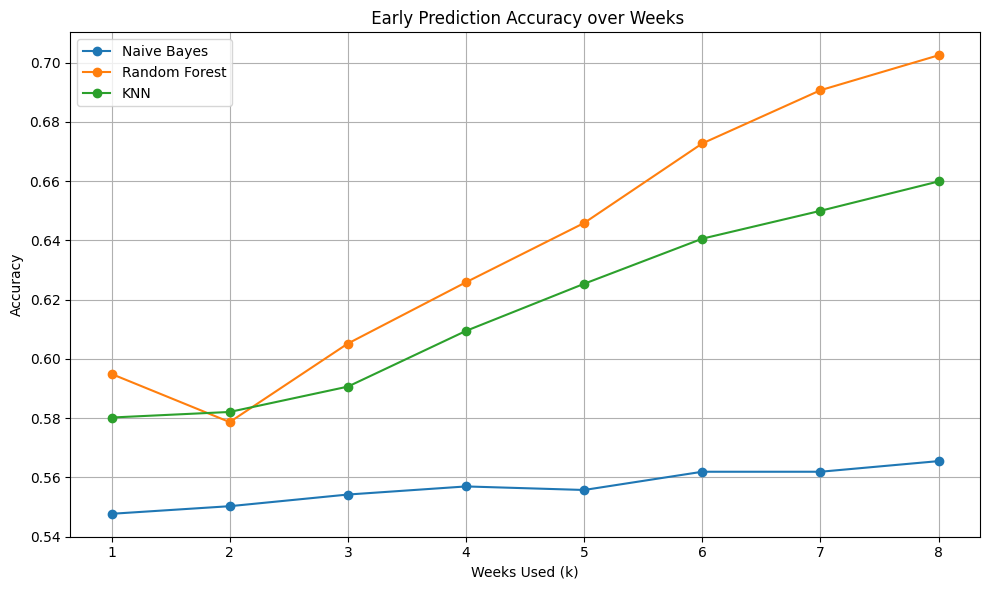

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#  Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Store results
early_results = {
    'Naive Bayes': [],
    'Random Forest': [],
    'KNN': []
}
weeks = list(range(1, 9))  # Weeks 1 to 8

#  Evaluate models week-by-week
for k in weeks:
    print(f"\n Evaluating using first {k} weeks")

    # Select only xp_week_1 to xp_week_k
    current_features = [f'xp_week_{i}' for i in range(1, k + 1)]

    # Select features and labels from xp_features_df
    X_curr = xp_features_df[current_features]
    y_curr = xp_features_df['label']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_curr, y_curr, test_size=0.2, random_state=42, stratify=y_curr
    )

    # Train and evaluate all 3 models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        early_results[name].append(acc)
        print(f"{name} Accuracy (Week {k}): {acc:.4f}")

#  Plotting the results
plt.figure(figsize=(10, 6))
for name, accs in early_results.items():
    plt.plot(weeks, accs, marker='o', label=name)

plt.title(" Early Prediction Accuracy over Weeks")
plt.xlabel("Weeks Used (k)")
plt.ylabel("Accuracy")
plt.xticks(weeks)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
